In [24]:
%matplotlib inline
import xarray as xr
import matplotlib.pyplot as plt
import numpy as npy
import numpy.ma as ma
import cartopy.crs as ccrs
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

In [20]:
file="/media/extra/DATA/ORCA12/ORCA12.L46-MJM189_y2000-2007.5d_EKE.nc"

ds=xr.open_dataset(file)
lat=ds.nav_lat
lon=ds.nav_lon
eke=ds.voeke[0,0]

In [21]:
eke_ma=eke.where(eke>0)


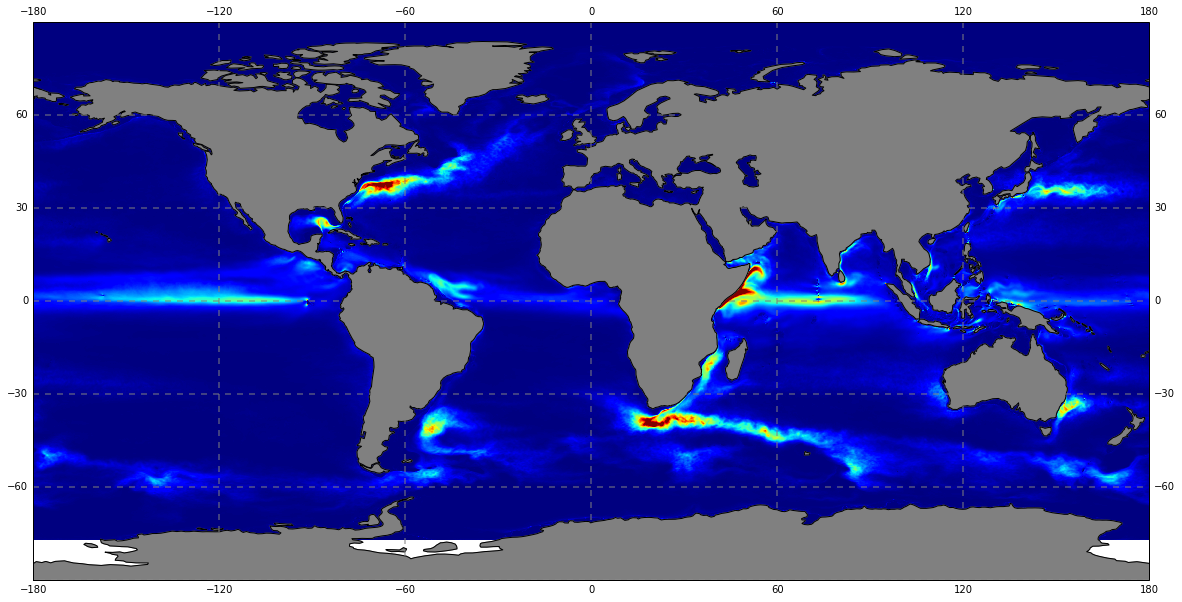

In [34]:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111,projection=ccrs.PlateCarree(central_longitude=0))
ax.pcolormesh(lon,lat,1e4*eke_ma,transform=ccrs.PlateCarree(),cmap='jet',vmin=0,vmax=2500)
ax.set_global()
ax.add_feature(cfeature.LAND,facecolor='grey')
ax.coastlines()
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
ax.xlabels_top = False
ax.ylabels_left = False
ax.xformatter = LONGITUDE_FORMATTER
ax.yformatter = LATITUDE_FORMATTER


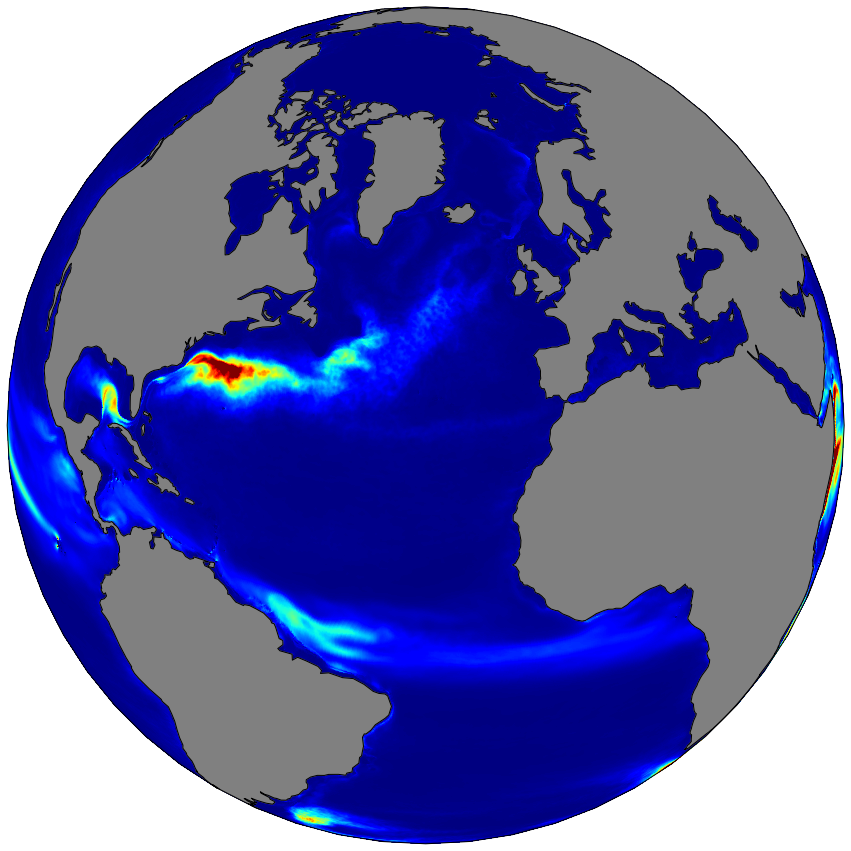

In [32]:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111,projection=ccrs.Orthographic(central_longitude=-30,
                                                    central_latitude=35))
ax.pcolormesh(lon,lat,1e4*eke_ma,transform=ccrs.PlateCarree(),cmap='jet',vmin=0,vmax=2500)
ax.set_global()
ax.add_feature(cfeature.LAND,facecolor='grey')
ax.coastlines()


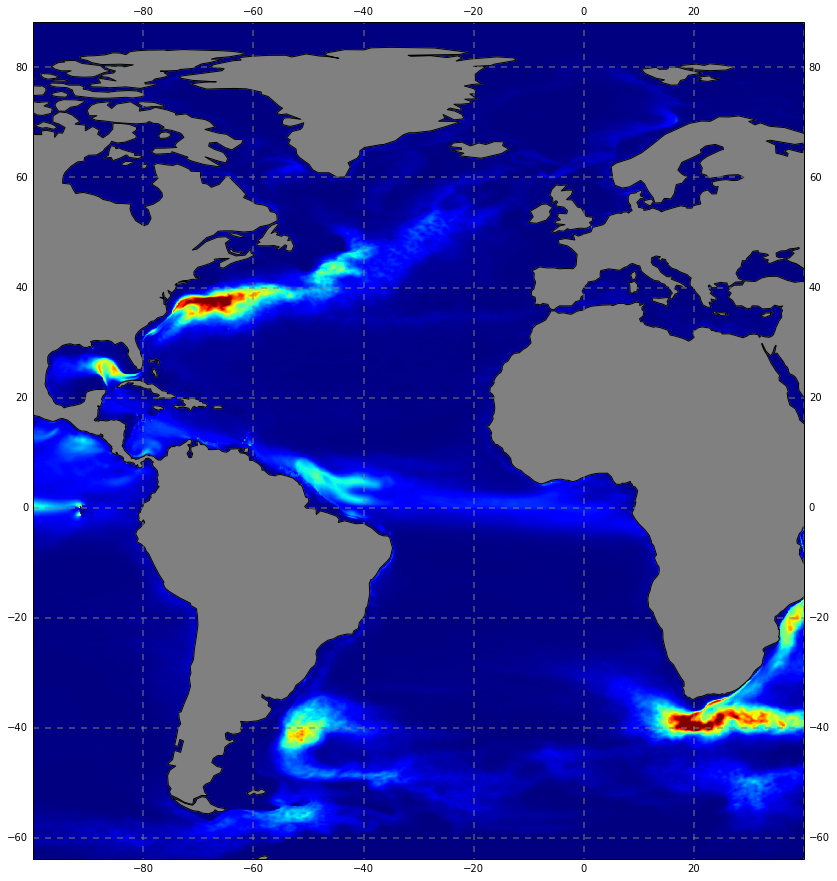

In [38]:
fig = plt.figure(figsize=(20,15))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))
ax.set_extent([-100, 40, -35, 85])
ax.pcolormesh(lon,lat,1e4*eke_ma,transform=ccrs.PlateCarree(),cmap='jet',vmin=0,vmax=2500)
ax.add_feature(cfeature.LAND,facecolor='grey')
ax.coastlines()
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
ax.xlabels_top = False
ax.ylabels_left = False

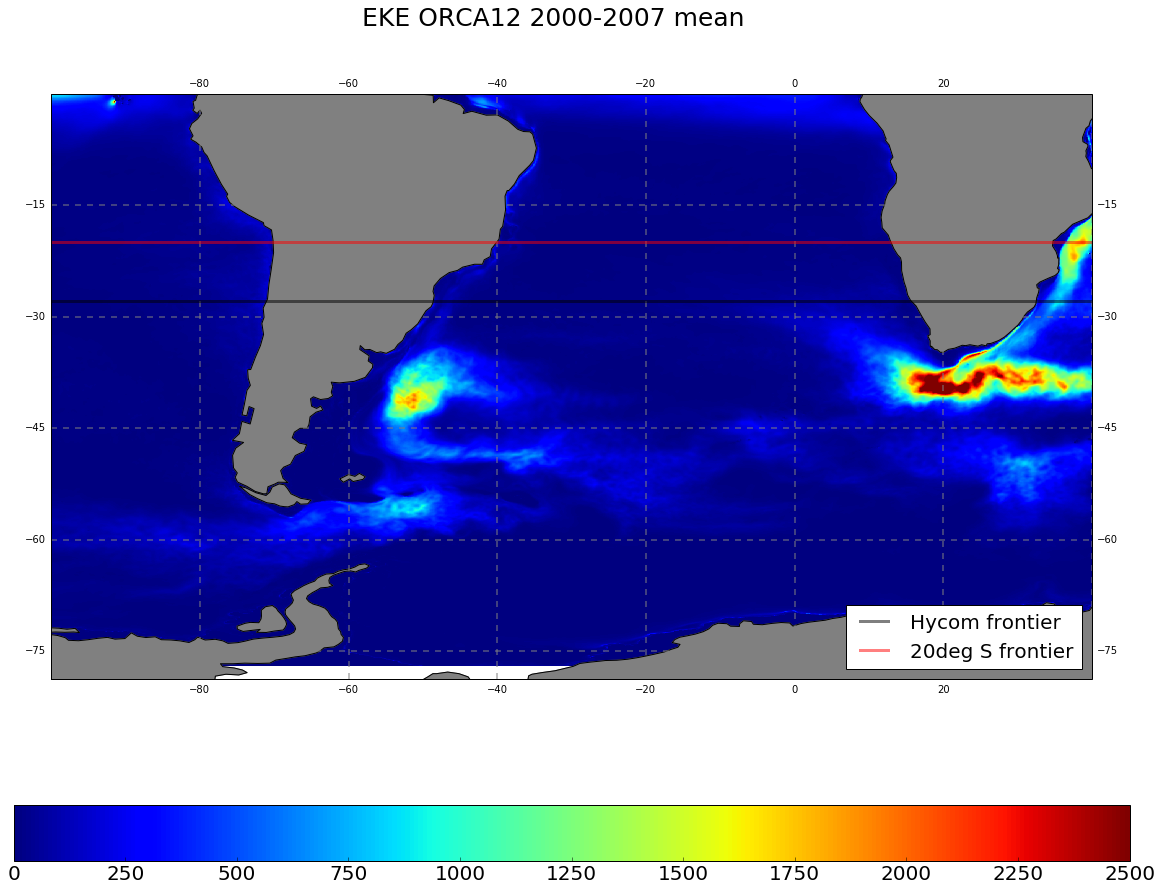

In [61]:
fig = plt.figure(figsize=(20,15))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-100, 40, -60, 0])
pcolor=ax.pcolormesh(lon,lat,1e4*eke_ma,transform=ccrs.PlateCarree(),cmap='jet',vmin=0,vmax=2500)
ax.add_feature(cfeature.LAND,facecolor='grey')
ax.coastlines()
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
x, y = [-100, 40], [-27.9, -27.9]
x2, y2 = [-100, 40], [-20, -20]
ax.plot(x, y, transform=ccrs.PlateCarree(), label="Hycom frontier",linewidth=3,color='k',alpha=0.5)
ax.plot(x2, y2, transform=ccrs.PlateCarree(), label="20deg S frontier",linewidth=3,color='r',alpha=0.5)
ax.legend(loc='lower right',fontsize=20)
ax.set_xlabel('Longitude (in degree)',fontsize=20)
cbar=plt.colorbar(pcolor,orientation='horizontal')
cbar.ax.tick_params(labelsize=20)
plt.suptitle("EKE ORCA12 2000-2007 mean",fontsize=25)

plt.savefig("eke_orca12_south_atl.png")

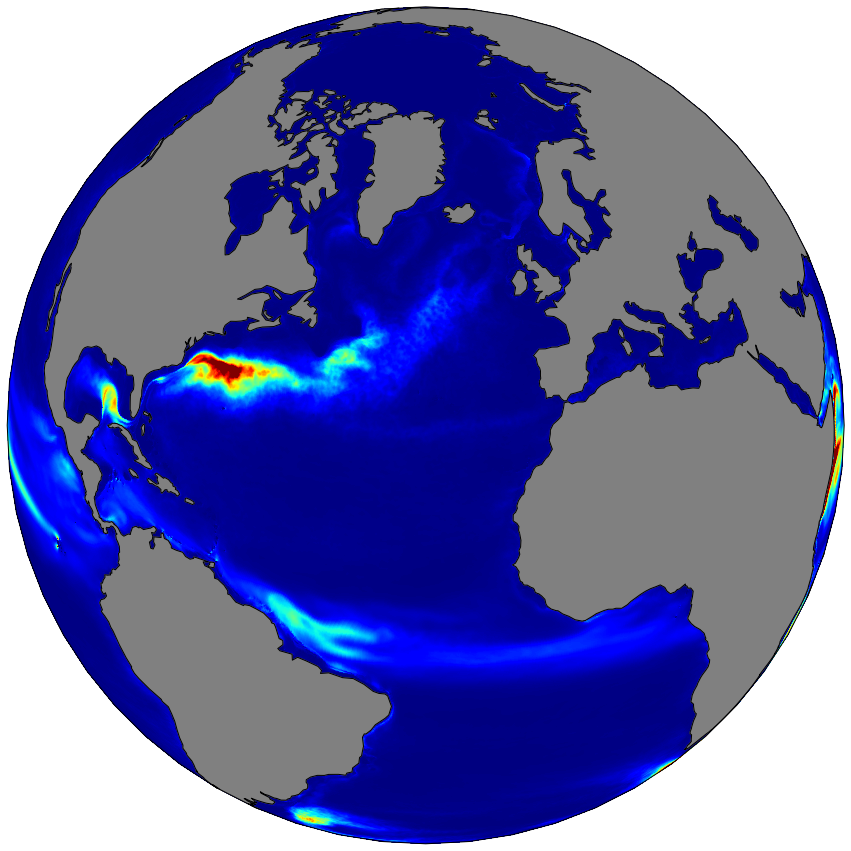

In [63]:
fig = plt.figure(figsize=(20,15))
projortho=ccrs.Orthographic(central_longitude=-30,central_latitude=35)
ax = fig.add_subplot(111,projection=projortho)
ax.pcolormesh(lon,lat,1e4*eke_ma,transform=ccrs.PlateCarree(),cmap='jet',vmin=0,vmax=2500)
ax.set_global()
ax.add_feature(cfeature.LAND,facecolor='grey')
ax.coastlines()
x, y = [-100, 40], [-27.9, -27.9]
x2, y2 = [-100, 40], [-20, -20]
ax.plot(x, y, transform=projortho, label="Hycom frontier",linewidth=3,color='k',alpha=0.5)
ax.plot(x2, y2, transform=projortho, label="20deg S frontier",linewidth=3,color='r',alpha=0.5)
